In [ ]:
#input parameters
planned_units = 20000
selling_price = 15 #dollars
variable_cost = 9 #dollars
fixed_cost = 60000

#cost calculations
total_cost = variable_cost*planned_units + fixed_cost
total_rev = selling_price*planned_units
profit = total_rev-total_cost

#print outputs
print("profit = ", profit)

profit =  60000


In [ ]:
def profit_model(planned_units, selling_price, variable_cost, fixed_cost):
    total_cost = variable_cost * planned_units + fixed_cost
    total_rev = selling_price * planned_units
    profit = total_rev - total_cost
    return profit

# Multivariable Risk Analysis (Monte Carlo)

Next, let's see how to execute multi-variable risk analysis. Consider the following random distributions of inputs:
*   planned_units ~ Normal(20000, 1000)
*   selling_price ~ Normal(15, 3)
*   variable_cost ~ Normal(9, 1)
*   fixed_cost ~ Normal(60000, 3000)

(array([  17.,   87.,  549., 1638., 2820., 2722., 1540.,  511.,  103.,
          13.]),
 array([16227.35331982, 16983.85024923, 17740.34717863, 18496.84410804,
        19253.34103745, 20009.83796686, 20766.33489627, 21522.83182568,
        22279.32875508, 23035.82568449, 23792.3226139 ]),
 <BarContainer object of 10 artists>)

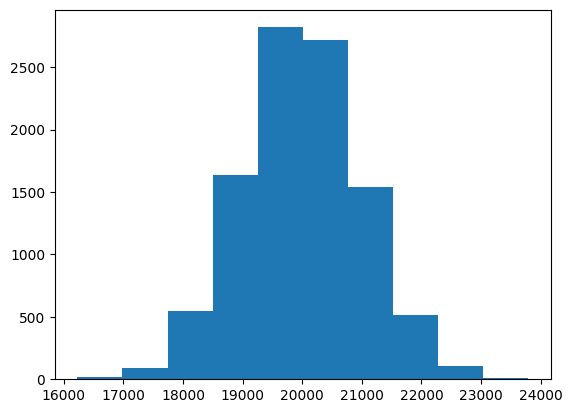

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

num_sim = 10000
sim_planned_units = np.random.normal(20000, 1000, num_sim)

plt.hist(sim_planned_units)

In [ ]:
num_sim = 10000
sim_planned_units = np.random.normal(20000, 1000, num_sim)
sim_selling_price = np.random.normal(15, 3, num_sim)
sim_variable_cost = np.random.normal(9, 1, num_sim)
sim_fixed_cost = np.random.normal(60000, 3000, num_sim)

In [ ]:
#evaluate the profit outcome for each scenario
sim_profits = [profit_model(planned_units = sim_planned_units[i],
                            selling_price = sim_selling_price[i],
                            variable_cost = sim_variable_cost[i],
                            fixed_cost = sim_fixed_cost[i]) for i in range(num_sim)]


(array([  26.,  206.,  743., 1935., 2793., 2486., 1314.,  409.,   81.,
           7.]),
 array([-162599.86874018, -115835.96684816,  -69072.06495613,
         -22308.16306411,   24455.73882791,   71219.64071993,
         117983.54261195,  164747.44450398,  211511.346396  ,
         258275.24828802,  305039.15018004]),
 <BarContainer object of 10 artists>)

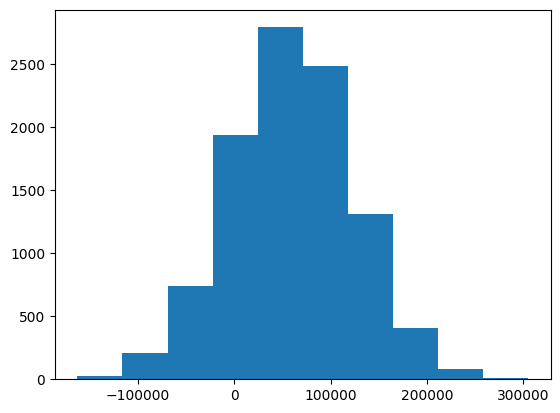

In [ ]:
plt.hist(sim_profits)

#Analyzing Simultation Data with Linear Regression



1.   Wrangling data into Pandas
2.   Running and interpreting linear regression analysis



In [ ]:
import pandas as pd

In [ ]:
data = pd.DataFrame(zip(sim_planned_units, sim_selling_price,
                    sim_variable_cost, sim_fixed_cost,
                    sim_profits))

In [ ]:
data

,0,1,2,3,4
0,19246.094865,15.159460,8.441765,61574.397953,67715.004158
1,19401.918414,16.596685,8.621522,58381.712578,96351.750397
2,18197.050703,13.079775,9.533800,59133.612199,5392.679566
3,18818.526757,18.445806,8.167488,59445.888101,133976.912284
4,21433.942157,15.392480,9.996144,58727.186888,56937.582939
...,...,...,...,...,...
9995,20713.416839,13.739560,9.406116,61050.337801,28710.099726
9996,18820.209660,13.711165,8.929364,54538.316994,35456.178097
9997,21966.485129,15.847868,7.706045,54747.748732,124099.496464
9998,20121.847724,15.694435,9.106424,59873.687134,72689.268963


In [ ]:
data = pd.DataFrame(zip(sim_planned_units, sim_selling_price,
                    sim_variable_cost, sim_fixed_cost,
                    sim_profits),
                    columns = ['sim_planned_units',
                               'sim_selling_price',
                               'sim_variable_cost',
                               'sim_fixed_cost',
                               'sim_profits'])

In [ ]:
data

,sim_planned_units,sim_selling_price,sim_variable_cost,sim_fixed_cost,sim_profits
0,19246.094865,15.159460,8.441765,61574.397953,67715.004158
1,19401.918414,16.596685,8.621522,58381.712578,96351.750397
2,18197.050703,13.079775,9.533800,59133.612199,5392.679566
3,18818.526757,18.445806,8.167488,59445.888101,133976.912284
4,21433.942157,15.392480,9.996144,58727.186888,56937.582939
...,...,...,...,...,...
9995,20713.416839,13.739560,9.406116,61050.337801,28710.099726
9996,18820.209660,13.711165,8.929364,54538.316994,35456.178097
9997,21966.485129,15.847868,7.706045,54747.748732,124099.496464
9998,20121.847724,15.694435,9.106424,59873.687134,72689.268963


<Axes: xlabel='sim_planned_units', ylabel='sim_profits'>

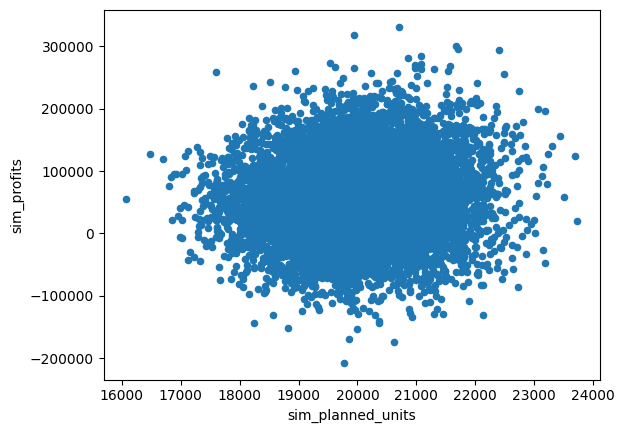

In [ ]:
# First, let's do some scatterplots:
# what's the relationship between my input and output?

data.plot.scatter(x = 'sim_planned_units', y = 'sim_profits')

In [ ]:
#Let's do a linear regression
import statsmodels.api as sm

In [ ]:
X = data[['sim_planned_units', 'sim_selling_price',
          'sim_variable_cost', 'sim_fixed_cost']]
y = data['sim_profits']

In [ ]:
X = sm.add_constant(data[['sim_planned_units', 'sim_selling_price',
          'sim_variable_cost', 'sim_fixed_cost']])
y = data['sim_profits']

In [ ]:
mod = sm.OLS(y, X, hasconstant = True)
result = mod.fit()
result.summary()

/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:130: ValueWarning: unknown kwargs ['hasconstant']
  warnings.warn(msg, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            sim_profits   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 1.019e+06
Date:                Thu, 11 Sep 2025   Prob (F-statistic):               0.00
Time:                        13:43:17   Log-Likelihood:                -94638.
No. Observations:               10000   AIC:                         1.893e+05
Df Residuals:                    9995   BIC:                         1.893e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -1.202e+05    934.249   -128.686      0.000   -1.22e+05   -1.18e+05
sim_planned_units     6.0032      0.031    191.437      0.000       5.942       6.065
sim_selling_price      2e+04     10.473   1910.134      0.000       2e+04       2e+04
sim_variable_cost     -2e+04     31.106   -642.931      0.000   -2.01e+04   -1.99e+04
sim_fixed_cost       -0.9992      0.010    -97.814      0.000      -1.019      -0.979
==============================================================================
Omnibus:                     1288.201   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14524.265
Skew:                          -0.160   Prob(JB):                         0.00
Kurtosis:                       8.895   Cond. No.                     1.90e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.9e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#normalize coefficients to reflect standard deviations of inputs
X.std()

,0
const,0.000000
sim_planned_units,994.688415
sim_selling_price,2.978611
sim_variable_cost,1.002771
sim_fixed_cost,3053.355730


In [ ]:
normalized_coefficients = result.params * X.std()

<Axes: >

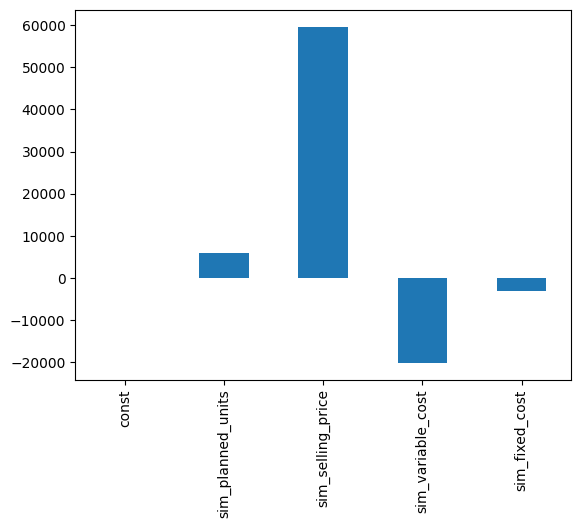

In [ ]:
normalized_coefficients.plot.bar()